In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import BaggingRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from xgboost import XGBRFRegressor
from lightgbm import LGBMRegressor
from catboost import CatBoostRegressor
from sklearn.metrics import r2_score

In [2]:
df = pd.read_csv('cleaned.csv')
df.head()

,Unnamed: 0,Company,TypeName,Ram,Weight,Price,Touchscreen,IPS,PPI,Cpu Brand,HDD,SSD,Hybrid,Flash_Storage,Gpu Brand,OS,log_price
0,0,Apple,Ultrabook,8,1.37,1339.69,0,1,226.983005,Intel Core i5,0,128,0,0,Intel,Mac Os,7.200194
1,1,Apple,Ultrabook,8,1.34,898.94,0,0,127.677940,Intel Core i5,0,0,0,128,Intel,Mac Os,6.801216
2,2,HP,Notebook,8,1.86,575.00,0,0,141.211998,Intel Core i5,0,256,0,0,Intel,No Os,6.354370
3,3,Apple,Ultrabook,16,1.83,2537.45,0,1,220.534624,Intel Core i7,0,512,0,0,AMD,Mac Os,7.838915
4,4,Apple,Ultrabook,8,1.37,1803.60,0,1,226.983005,Intel Core i5,0,256,0,0,Intel,Mac Os,7.497540


In [3]:
df.drop('Unnamed: 0', axis=1, inplace=True)# Dropping 'Unnamed: 0'
df.head()

,Company,TypeName,Ram,Weight,Price,Touchscreen,IPS,PPI,Cpu Brand,HDD,SSD,Hybrid,Flash_Storage,Gpu Brand,OS,log_price
0,Apple,Ultrabook,8,1.37,1339.69,0,1,226.983005,Intel Core i5,0,128,0,0,Intel,Mac Os,7.200194
1,Apple,Ultrabook,8,1.34,898.94,0,0,127.677940,Intel Core i5,0,0,0,128,Intel,Mac Os,6.801216
2,HP,Notebook,8,1.86,575.00,0,0,141.211998,Intel Core i5,0,256,0,0,Intel,No Os,6.354370
3,Apple,Ultrabook,16,1.83,2537.45,0,1,220.534624,Intel Core i7,0,512,0,0,AMD,Mac Os,7.838915
4,Apple,Ultrabook,8,1.37,1803.60,0,1,226.983005,Intel Core i5,0,256,0,0,Intel,Mac Os,7.497540


In [4]:
cols = ['Company', 'TypeName', 'Cpu Brand', 'Gpu Brand', 'OS']

# convrting categorical column to one hot encoded data
for col in cols:
    one = pd.get_dummies(df[col],prefix=col, drop_first=True)
    df = pd.concat([df,one],axis=1).drop(col,axis=1)

In [5]:
df.head()

,Ram,Weight,Price,Touchscreen,IPS,PPI,HDD,SSD,Hybrid,Flash_Storage,...,Cpu Brand_Intel Core i3,Cpu Brand_Intel Core i5,Cpu Brand_Intel Core i7,Cpu Brand_Other Intel Processor,Gpu Brand_Intel,Gpu Brand_Nvidia,OS_Linux,OS_Mac Os,OS_No Os,OS_Windows
0,8,1.37,1339.69,0,1,226.983005,0,128,0,0,...,0,1,0,0,1,0,0,1,0,0
1,8,1.34,898.94,0,0,127.677940,0,0,0,128,...,0,1,0,0,1,0,0,1,0,0
2,8,1.86,575.00,0,0,141.211998,0,256,0,0,...,0,1,0,0,1,0,0,0,1,0
3,16,1.83,2537.45,0,1,220.534624,0,512,0,0,...,0,0,1,0,0,0,0,1,0,0
4,8,1.37,1803.60,0,1,226.983005,0,256,0,0,...,0,1,0,0,1,0,0,1,0,0


In [6]:
x = df.drop(columns=['Price', 'log_price'])# separating target and features
y = df['log_price']

In [7]:
x.head()

,Ram,Weight,Touchscreen,IPS,PPI,HDD,SSD,Hybrid,Flash_Storage,Company_Apple,...,Cpu Brand_Intel Core i3,Cpu Brand_Intel Core i5,Cpu Brand_Intel Core i7,Cpu Brand_Other Intel Processor,Gpu Brand_Intel,Gpu Brand_Nvidia,OS_Linux,OS_Mac Os,OS_No Os,OS_Windows
0,8,1.37,0,1,226.983005,0,128,0,0,1,...,0,1,0,0,1,0,0,1,0,0
1,8,1.34,0,0,127.677940,0,0,0,128,1,...,0,1,0,0,1,0,0,1,0,0
2,8,1.86,0,0,141.211998,0,256,0,0,0,...,0,1,0,0,1,0,0,0,1,0
3,16,1.83,0,1,220.534624,0,512,0,0,1,...,0,0,1,0,0,0,0,1,0,0
4,8,1.37,0,1,226.983005,0,256,0,0,1,...,0,1,0,0,1,0,0,1,0,0


In [8]:
y.head()

0    7.200194
1    6.801216
2    6.354370
3    7.838915
4    7.497540
Name: log_price, dtype: float64

In [9]:
x_train, x_test, y_train, y_test =train_test_split(x,y,test_size=0.30,random_state=2) # spilt as ratio 70:30

In [10]:
model_list=[]
score=[]

#AdaBoostRegressor
ada = AdaBoostRegressor()
ada.fit(x_train,y_train)
y_pred_ada = ada.predict(x_test)
score.append(ada.score(x_test,y_test))
model_list.append('AdaBoostRegressor')

#BaggingRegressor
bag = BaggingRegressor()
bag.fit(x_train,y_train)
y_pred_bag = bag.predict(x_test)
score.append(bag.score(x_test,y_test))
model_list.append('BaggingRegressor')

#ExtraTreesRegressor
ext = ExtraTreesRegressor()
ext.fit(x_train,y_train)
y_pred_ext = ext.predict(x_test)
score.append(ext.score(x_test,y_test))
model_list.append('ExtraTreesRegressor')

#GradientBoostingRegressor
gdb = GradientBoostingRegressor()
gdb.fit(x_train,y_train)
y_pred_gdb = gdb.predict(x_test)
score.append(gdb.score(x_test,y_test))
model_list.append('GradientBoostingRegressor')

#RandomForestRegressor
rf = RandomForestRegressor()
rf.fit(x_train,y_train)
y_pred_rf = rf.predict(x_test)
score.append(rf.score(x_test,y_test))
model_list.append('RandomForestRegressor')

#XGBRegressor
xgb = XGBRegressor()
xgb.fit(x_train,y_train)
y_pred_xgb = xgb.predict(x_test)
score.append(xgb.score(x_test,y_test))
model_list.append('XGBRegressor')

#LGBMRegressor
lgb = LGBMRegressor()
lgb.fit(x_train,y_train)
y_pred_lgb = lgb.predict(x_test)
score.append(lgb.score(x_test,y_test))
model_list.append('LGBMRegressor')

#CatBoostRegressor
cat = CatBoostRegressor()
cat.fit(x_train,y_train)
y_pred_cat = cat.predict(x_test)
score.append(cat.score(x_test,y_test))
model_list.append('CatBoostRegressor')

#DecisionTreeRegressor
dt = DecisionTreeRegressor()
dt.fit(x_train,y_train)
y_pred_dt = dt.predict(x_test)
score.append(dt.score(x_test,y_test))
model_list.append('DecisionTreeRegressor')

#LinearRegression
lr =LinearRegression()
lr.fit(x_train,y_train)
y_pred_lr = lr.predict(x_test)
score.append(lr.score(x_test,y_test))
model_list.append('LinearRegression')

#KNeighborsRegressor
knn = KNeighborsRegressor()
knn.fit(x_train,y_train)
y_pred_knn = knn.predict(x_test)
score.append(knn.score(x_test,y_test))
model_list.append('KNeighborsRegressor')

#SVR RBF
svr = SVR()
svr.fit(x_train,y_train)
y_pred_svr = svr.predict(x_test)
score.append(svr.score(x_test,y_test))
model_list.append('SVR RBF')

Learning rate set to 0.040337
0:	learn: 0.5953014	total: 120ms	remaining: 2m
1:	learn: 0.5794507	total: 127ms	remaining: 1m 3s
2:	learn: 0.5643281	total: 137ms	remaining: 45.7s
3:	learn: 0.5496505	total: 142ms	remaining: 35.5s
4:	learn: 0.5355429	total: 151ms	remaining: 30.1s
5:	learn: 0.5232542	total: 157ms	remaining: 26.1s
6:	learn: 0.5108540	total: 174ms	remaining: 24.7s
7:	learn: 0.4991320	total: 181ms	remaining: 22.4s
8:	learn: 0.4873087	total: 187ms	remaining: 20.5s
9:	learn: 0.4766647	total: 192ms	remaining: 19s
10:	learn: 0.4669480	total: 195ms	remaining: 17.6s
11:	learn: 0.4564321	total: 199ms	remaining: 16.4s
12:	learn: 0.4468545	total: 202ms	remaining: 15.3s
13:	learn: 0.4377229	total: 205ms	remaining: 14.4s
14:	learn: 0.4290231	total: 208ms	remaining: 13.6s
15:	learn: 0.4208441	total: 210ms	remaining: 12.9s
16:	learn: 0.4125243	total: 213ms	remaining: 12.3s
17:	learn: 0.4049569	total: 215ms	remaining: 11.7s
18:	learn: 0.3974406	total: 217ms	remaining: 11.2s
19:	learn: 0.390

230:	learn: 0.1841274	total: 490ms	remaining: 1.63s
231:	learn: 0.1839096	total: 492ms	remaining: 1.63s
232:	learn: 0.1837646	total: 493ms	remaining: 1.62s
233:	learn: 0.1836289	total: 494ms	remaining: 1.62s
234:	learn: 0.1834187	total: 495ms	remaining: 1.61s
235:	learn: 0.1832107	total: 496ms	remaining: 1.6s
236:	learn: 0.1831512	total: 497ms	remaining: 1.6s
237:	learn: 0.1828376	total: 500ms	remaining: 1.6s
238:	learn: 0.1827753	total: 501ms	remaining: 1.59s
239:	learn: 0.1825778	total: 502ms	remaining: 1.59s
240:	learn: 0.1823121	total: 503ms	remaining: 1.58s
241:	learn: 0.1822166	total: 504ms	remaining: 1.58s
242:	learn: 0.1818871	total: 505ms	remaining: 1.57s
243:	learn: 0.1815018	total: 507ms	remaining: 1.57s
244:	learn: 0.1811779	total: 508ms	remaining: 1.56s
245:	learn: 0.1811461	total: 509ms	remaining: 1.56s
246:	learn: 0.1809968	total: 510ms	remaining: 1.55s
247:	learn: 0.1809576	total: 511ms	remaining: 1.55s
248:	learn: 0.1808062	total: 513ms	remaining: 1.55s
249:	learn: 0.1

476:	learn: 0.1463585	total: 813ms	remaining: 891ms
477:	learn: 0.1461547	total: 816ms	remaining: 891ms
478:	learn: 0.1460584	total: 817ms	remaining: 889ms
479:	learn: 0.1459160	total: 819ms	remaining: 887ms
480:	learn: 0.1458353	total: 820ms	remaining: 885ms
481:	learn: 0.1457067	total: 821ms	remaining: 882ms
482:	learn: 0.1456654	total: 822ms	remaining: 880ms
483:	learn: 0.1455507	total: 823ms	remaining: 878ms
484:	learn: 0.1454007	total: 825ms	remaining: 876ms
485:	learn: 0.1453364	total: 826ms	remaining: 873ms
486:	learn: 0.1452382	total: 827ms	remaining: 871ms
487:	learn: 0.1450722	total: 828ms	remaining: 869ms
488:	learn: 0.1449856	total: 830ms	remaining: 867ms
489:	learn: 0.1448437	total: 831ms	remaining: 865ms
490:	learn: 0.1446870	total: 832ms	remaining: 863ms
491:	learn: 0.1445240	total: 834ms	remaining: 861ms
492:	learn: 0.1443895	total: 835ms	remaining: 859ms
493:	learn: 0.1442314	total: 837ms	remaining: 857ms
494:	learn: 0.1441350	total: 839ms	remaining: 856ms
495:	learn: 

689:	learn: 0.1273424	total: 1.11s	remaining: 501ms
690:	learn: 0.1272873	total: 1.12s	remaining: 502ms
691:	learn: 0.1271768	total: 1.14s	remaining: 506ms
692:	learn: 0.1270354	total: 1.14s	remaining: 507ms
693:	learn: 0.1269936	total: 1.15s	remaining: 506ms
694:	learn: 0.1269269	total: 1.15s	remaining: 505ms
695:	learn: 0.1269144	total: 1.15s	remaining: 503ms
696:	learn: 0.1268840	total: 1.16s	remaining: 502ms
697:	learn: 0.1267934	total: 1.16s	remaining: 501ms
698:	learn: 0.1266867	total: 1.16s	remaining: 500ms
699:	learn: 0.1265723	total: 1.16s	remaining: 498ms
700:	learn: 0.1264259	total: 1.16s	remaining: 497ms
701:	learn: 0.1263953	total: 1.17s	remaining: 495ms
702:	learn: 0.1262882	total: 1.17s	remaining: 494ms
703:	learn: 0.1261844	total: 1.17s	remaining: 492ms
704:	learn: 0.1261373	total: 1.17s	remaining: 491ms
705:	learn: 0.1260537	total: 1.18s	remaining: 490ms
706:	learn: 0.1260252	total: 1.18s	remaining: 488ms
707:	learn: 0.1259351	total: 1.18s	remaining: 487ms
708:	learn: 

905:	learn: 0.1134477	total: 1.43s	remaining: 148ms
906:	learn: 0.1133244	total: 1.43s	remaining: 147ms
907:	learn: 0.1132868	total: 1.43s	remaining: 145ms
908:	learn: 0.1132207	total: 1.44s	remaining: 144ms
909:	learn: 0.1131269	total: 1.44s	remaining: 142ms
910:	learn: 0.1130865	total: 1.44s	remaining: 140ms
911:	learn: 0.1130755	total: 1.44s	remaining: 139ms
912:	learn: 0.1130487	total: 1.44s	remaining: 137ms
913:	learn: 0.1130033	total: 1.44s	remaining: 136ms
914:	learn: 0.1129164	total: 1.44s	remaining: 134ms
915:	learn: 0.1128405	total: 1.44s	remaining: 132ms
916:	learn: 0.1128221	total: 1.44s	remaining: 131ms
917:	learn: 0.1127310	total: 1.45s	remaining: 129ms
918:	learn: 0.1126700	total: 1.45s	remaining: 128ms
919:	learn: 0.1126364	total: 1.45s	remaining: 126ms
920:	learn: 0.1125471	total: 1.45s	remaining: 124ms
921:	learn: 0.1124725	total: 1.45s	remaining: 123ms
922:	learn: 0.1124159	total: 1.45s	remaining: 121ms
923:	learn: 0.1123535	total: 1.45s	remaining: 120ms
924:	learn: 

In [11]:
score

[0.8199178643997977,
 0.882909264919251,
 0.8786923014303027,
 0.8783708779486359,
 0.8946486282229102,
 0.9061340652380705,
 0.9017049504900695,
 0.9093476134740521,
 0.8055134048406806,
 0.8336130123743052,
 0.8007297753422092,
 0.6496854821060358]

In [12]:
model_list

['AdaBoostRegressor',
 'BaggingRegressor',
 'ExtraTreesRegressor',
 'GradientBoostingRegressor',
 'RandomForestRegressor',
 'XGBRegressor',
 'LGBMRegressor',
 'CatBoostRegressor',
 'DecisionTreeRegressor',
 'LinearRegression',
 'KNeighborsRegressor',
 'SVR RBF']

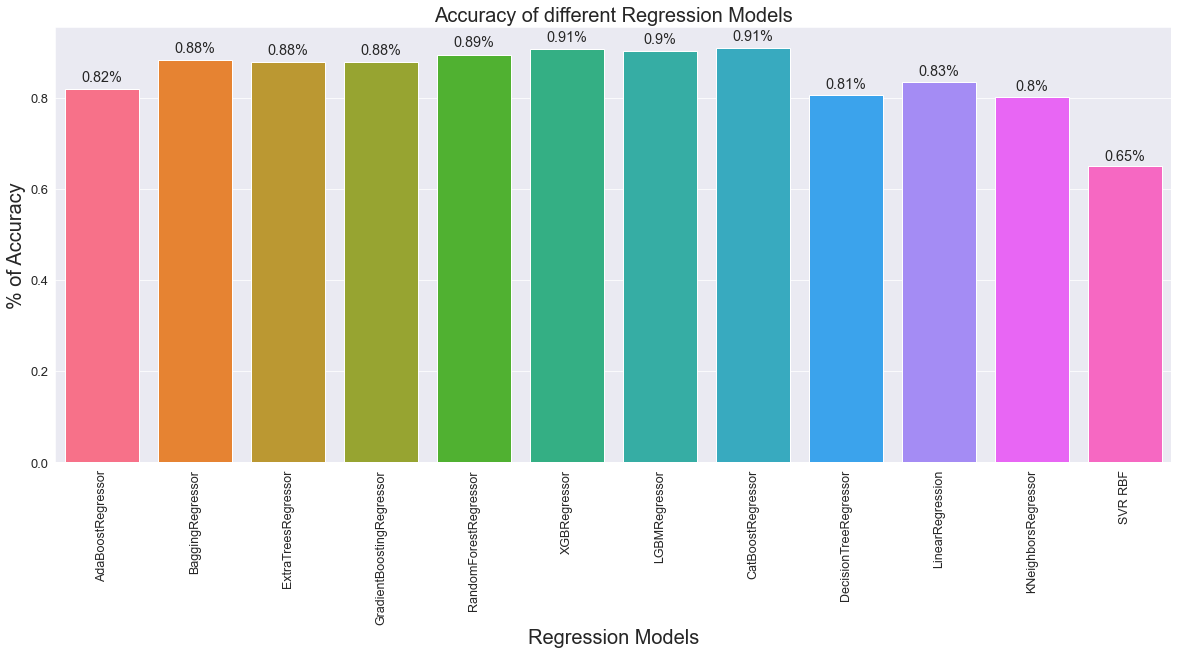

In [13]:
plt.rcParams['figure.figsize']=20,8
sns.set_style('darkgrid')
ax = sns.barplot(x=model_list, y=score, palette = "husl", saturation =2.0)
plt.xlabel('Regression Models', fontsize = 20 )
plt.ylabel('% of Accuracy', fontsize = 20)
plt.title('Accuracy of different Regression Models', fontsize = 20)
plt.xticks(fontsize = 12.5, horizontalalignment = 'center', rotation='vertical')
plt.yticks(fontsize = 13)
for i in ax.patches:
    width, height = i.get_width(), i.get_height()
    x, y = i.get_xy() 
    ax.annotate(f'{round(height,2)}%', (x + width/2, y + height*1.02), ha='center', fontsize = 'x-large')
plt.show()


In [14]:
from sklearn.ensemble import VotingRegressor

In [15]:
er = VotingRegressor([('r1', cat), ('r2', xgb), ('r3', lgb), ('r4', rf)])

In [16]:
er.fit(x_train, y_train)

Learning rate set to 0.040337
0:	learn: 0.5953014	total: 3.59ms	remaining: 3.59s
1:	learn: 0.5794507	total: 6.61ms	remaining: 3.3s
2:	learn: 0.5643281	total: 9.46ms	remaining: 3.15s
3:	learn: 0.5496505	total: 12.4ms	remaining: 3.09s
4:	learn: 0.5355429	total: 15.3ms	remaining: 3.05s
5:	learn: 0.5232542	total: 18.6ms	remaining: 3.08s
6:	learn: 0.5108540	total: 21.7ms	remaining: 3.07s
7:	learn: 0.4991320	total: 27.7ms	remaining: 3.43s
8:	learn: 0.4873087	total: 31.9ms	remaining: 3.52s
9:	learn: 0.4766647	total: 35.1ms	remaining: 3.48s
10:	learn: 0.4669480	total: 38.9ms	remaining: 3.5s
11:	learn: 0.4564321	total: 42.4ms	remaining: 3.49s
12:	learn: 0.4468545	total: 45.4ms	remaining: 3.45s
13:	learn: 0.4377229	total: 48.3ms	remaining: 3.4s
14:	learn: 0.4290231	total: 51.3ms	remaining: 3.37s
15:	learn: 0.4208441	total: 54.7ms	remaining: 3.36s
16:	learn: 0.4125243	total: 57.3ms	remaining: 3.31s
17:	learn: 0.4049569	total: 60.2ms	remaining: 3.29s
18:	learn: 0.3974406	total: 63.4ms	remaining: 3

215:	learn: 0.1873237	total: 310ms	remaining: 1.12s
216:	learn: 0.1871966	total: 311ms	remaining: 1.12s
217:	learn: 0.1870491	total: 313ms	remaining: 1.12s
218:	learn: 0.1868102	total: 314ms	remaining: 1.12s
219:	learn: 0.1867429	total: 315ms	remaining: 1.12s
220:	learn: 0.1865117	total: 316ms	remaining: 1.11s
221:	learn: 0.1861504	total: 318ms	remaining: 1.11s
222:	learn: 0.1859419	total: 319ms	remaining: 1.11s
223:	learn: 0.1856737	total: 320ms	remaining: 1.11s
224:	learn: 0.1852983	total: 321ms	remaining: 1.11s
225:	learn: 0.1849982	total: 322ms	remaining: 1.1s
226:	learn: 0.1849098	total: 324ms	remaining: 1.1s
227:	learn: 0.1848505	total: 325ms	remaining: 1.1s
228:	learn: 0.1845075	total: 326ms	remaining: 1.1s
229:	learn: 0.1843523	total: 328ms	remaining: 1.1s
230:	learn: 0.1841274	total: 329ms	remaining: 1.1s
231:	learn: 0.1839096	total: 331ms	remaining: 1.09s
232:	learn: 0.1837646	total: 332ms	remaining: 1.09s
233:	learn: 0.1836289	total: 333ms	remaining: 1.09s
234:	learn: 0.1834

491:	learn: 0.1445240	total: 637ms	remaining: 658ms
492:	learn: 0.1443895	total: 638ms	remaining: 657ms
493:	learn: 0.1442314	total: 640ms	remaining: 656ms
494:	learn: 0.1441350	total: 641ms	remaining: 654ms
495:	learn: 0.1441223	total: 642ms	remaining: 653ms
496:	learn: 0.1439365	total: 643ms	remaining: 651ms
497:	learn: 0.1439116	total: 644ms	remaining: 650ms
498:	learn: 0.1438779	total: 645ms	remaining: 648ms
499:	learn: 0.1436997	total: 647ms	remaining: 647ms
500:	learn: 0.1436283	total: 648ms	remaining: 645ms
501:	learn: 0.1435570	total: 649ms	remaining: 644ms
502:	learn: 0.1433697	total: 650ms	remaining: 642ms
503:	learn: 0.1433178	total: 651ms	remaining: 641ms
504:	learn: 0.1433095	total: 652ms	remaining: 639ms
505:	learn: 0.1431916	total: 653ms	remaining: 638ms
506:	learn: 0.1430359	total: 654ms	remaining: 636ms
507:	learn: 0.1429110	total: 656ms	remaining: 635ms
508:	learn: 0.1428999	total: 657ms	remaining: 634ms
509:	learn: 0.1428840	total: 658ms	remaining: 632ms
510:	learn: 

784:	learn: 0.1206126	total: 966ms	remaining: 265ms
785:	learn: 0.1205974	total: 968ms	remaining: 264ms
786:	learn: 0.1205492	total: 969ms	remaining: 262ms
787:	learn: 0.1204738	total: 970ms	remaining: 261ms
788:	learn: 0.1204358	total: 971ms	remaining: 260ms
789:	learn: 0.1203147	total: 972ms	remaining: 258ms
790:	learn: 0.1202957	total: 973ms	remaining: 257ms
791:	learn: 0.1201711	total: 975ms	remaining: 256ms
792:	learn: 0.1200875	total: 976ms	remaining: 255ms
793:	learn: 0.1199750	total: 977ms	remaining: 253ms
794:	learn: 0.1199454	total: 978ms	remaining: 252ms
795:	learn: 0.1198793	total: 979ms	remaining: 251ms
796:	learn: 0.1198161	total: 980ms	remaining: 250ms
797:	learn: 0.1197983	total: 981ms	remaining: 248ms
798:	learn: 0.1197563	total: 982ms	remaining: 247ms
799:	learn: 0.1197080	total: 984ms	remaining: 246ms
800:	learn: 0.1196093	total: 985ms	remaining: 245ms
801:	learn: 0.1195389	total: 986ms	remaining: 243ms
802:	learn: 0.1194562	total: 987ms	remaining: 242ms
803:	learn: 

VotingRegressor(estimators=[('r1',
                             <catboost.core.CatBoostRegressor object at 0x00000210D875C100>),
                            ('r2',
                             XGBRegressor(base_score=0.5, booster='gbtree',
                                          callbacks=None, colsample_bylevel=1,
                                          colsample_bynode=1,
                                          colsample_bytree=1,
                                          early_stopping_rounds=None,
                                          enable_categorical=False,
                                          eval_metric=None, gamma=0, gpu_id=-1,
                                          grow_policy='depthwise',
                                          importance_type=None,
                                          interaction_constraints='',
                                          learning_rate=0.300000012,
                                          max_bin=256, max_cat_to_onehot=4,
                                          max_delta_step=0, max_depth=6,
                                          max_leaves=0, min_child_weight=1,
                                          missing=nan,
                                          monotone_constraints='()',
                                          n_estimators=100, n_jobs=0,
                                          num_parallel_tree=1, predictor='auto',
                                          random_state=0, reg_alpha=0,
                                          reg_lambda=1, ...)),
                            ('r3', LGBMRegressor()),
                            ('r4', RandomForestRegressor())])

In [17]:
er.score(x_test, y_test)

0.9132450450721489

In [18]:
pred = np.exp(er.predict(x_test))
pred_df = pd.DataFrame(columns=['Predictions', 'Actual'])

In [19]:
pred_df['Predictions'] = pred

In [20]:
pred_df['Actual'] = df['Price']

In [21]:
pred_df.head(10)

,Predictions,Actual
0,429.980254,1339.69
1,363.359852,898.94
2,459.523561,575.00
3,1380.441245,2537.45
4,751.032690,1803.60
5,952.804726,400.00
6,1087.320860,2139.97
7,698.505804,1158.70
8,1929.602237,1495.00
9,465.560682,770.00


In [22]:
import pickle
pickle.dump(er,open('model.pkl','wb'))
